In [1]:
# from package.binnier import imbin
import skimage as sk
from package.binnier import imbin
import matplotlib.pyplot as plt

image = sk.io.imread('./../domes/domes_n2v/70_denoised.tif')
print(image.shape)
dots = imbin(image[2], is2D=False, treat_3D_as_2D=False)

dots.hi()

#dots.get_mask(binshape=(2,2,2), times=3, v='+');

# plt.imshow(dots.mask(binshape=(2,2)))
# plt.imshow(dots.conv_deconv(v='+'))




(6, 550, 858, 858)
Your image has 3 dimensions. It contains 3 spatial dimensions. Time is False.


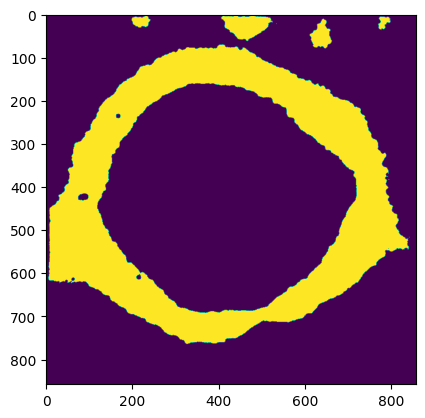

In [5]:
plt.imshow(dots.mask[400])

In [10]:
dots2 = imbin(image[2], is2D=False, treat_3D_as_2D=True)
dots2.hi()
dots2.get_mask(binshape=(2,2), times=3, v='+')

Your image has 3 dimensions. It contains 3 spatial dimensions. Time is False.


KeyboardInterrupt: 

In [7]:
import napari
viewer = napari.Viewer()
viewer.add_image(dots.mask)
viewer.add_image(image[2])

<Image layer 'Image [1]' at 0x1d6328c7dd0>

In [11]:
#### FINAL TEST ####
import skimage as sk
from package.binnier import imbin
import matplotlib.pyplot as plt
import time

image = sk.io.imread('./../domes/domes_n2v/70_denoised.tif') # 4D image

# Single 2D image
time_start_1 = time.perf_counter()
print('1.   Single 2D image')
dots1 = imbin(image[4][300], is2D=True)
dots1.hi()
dots1.get_mask(binshape=(2,2), times=3, v='+')
time_end_1 = time.perf_counter()
print(f"Finish test. It took {time_end_1-time_start_1:.2f} seconds")

# Multiple 2D image
time_start_2 = time.perf_counter()
print('2.   Multiple 2D image')
dots2 = imbin(image[4], is2D=True)
dots2.hi()
dots2.get_mask(binshape=(2,2), times=3, v='+')
time_end_2 = time.perf_counter()
print(f"Finish test. It took {time_end_2-time_start_2:.2f} seconds")

# Single 3D image
time_start_3 = time.perf_counter()
print('3.   Single 3D image')
dots3 = imbin(image[4], is2D=False)
dots3.hi()
dots3.get_mask(binshape=(2,2,2), times=3, v='+')
time_end_3 = time.perf_counter()
print(f"Finish test. It took {time_end_3-time_start_3:.2f} seconds")

# Single 3D image as multiple 2D images
time_start_4 = time.perf_counter()
print('4.   Single 3D image as multiple 2D images')
dots4 = imbin(image[4], is2D=False, treat_3D_as_2D=True)
dots4.hi()
dots4.get_mask(binshape=(2,2), times=3, v='+')
time_end_4 = time.perf_counter()
print(f"Finish test. It took {time_end_4-time_start_4:.2f} seconds")

# Multiple 3D images
time_start_5 = time.perf_counter()
print('5.   Multiple 3D images')
dots5 = imbin(image, is2D=False)
dots5.hi()
dots5.get_mask(binshape=(2,2,2), times=3, v='+')
time_end_5 = time.perf_counter()
print(f"Finish test. It took {time_end_5-time_start_5:.2f} seconds")

# Multiple 3D image as multiple 2D images
time_start_6 = time.perf_counter()
print('6.   Multiple 3D image as multiple 2D images')
dots6 = imbin(image, is2D=False, treat_3D_as_2D=True)
dots6.hi()
dots6.get_mask(binshape=(2,2,2), times=3, v='+')
time_end_6 = time.perf_counter()
print(f"Finish test. It took {time_end_6-time_start_6:.2f} seconds")



Single 2D image
Your image has 2 dimensions. It contains 2 spatial dimensions. Time is False.
Finish test. It took 5.03 seconds
Multiple 2D image
Your image has 3 dimensions. It contains 2 spatial dimensions. Time is True.
Finish test. It took 2689.81 seconds
Single 3D image
Your image has 3 dimensions. It contains 3 spatial dimensions. Time is False.
Convolving: 1/3
Convolving: 2/3
Convolving: 3/3
Deconvolving: 3/3
Deconvolving: 2/3
Deconvolving: 1/3
Finish test. It took 1967.91 seconds
Single 3D image as multiple 2D images
Your image has 3 dimensions. It contains 3 spatial dimensions. Time is False.
Finish test. It took 2705.66 seconds
Multiple 3D images
Your image has 4 dimensions. It contains 3 spatial dimensions. Time is True.
Finish test. It took 12276.20 seconds
Multiple 3D image as multiple 2D images
Your image has 4 dimensions. It contains 3 spatial dimensions. Time is True.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\Python_vscode\pynapari\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SPIM\AppData\Local\Temp\ipykernel_12228\3833708123.py", line 59, in <module>
    dots6.get_mask(binshape=(2,2,2), times=3, v='+')
  File "d:\Python_vscode\binner\package\binnier.py", line 658, in get_mask
  File "d:\Python_vscode\binner\package\binnier.py", line 430, in delaunay
    if self.sDim == 3 and self.time_dim is True and self.treat_3D_as_2D is True: # CASE 3D AND TIME AND TREAT 2D
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python_vscode\binner\package\binnier.py", line 13, in __init__
    super().__init__(points)
  File "_qhull.pyx", line 1827, in scipy.spatial._qhull.Delaunay.__init__
  File "_qhull.pyx", line 277, in scipy.spatial._qhull._Qhull.__init__
ValueError: No points given

During handling of the above exception, another exception occurred:

Trace

In [1]:
import skimage as sk
from binner.binnier_class import imbin
import matplotlib.pyplot as plt
import time
import numpy as np

image = sk.io.imread('./../domes/domes_n2v/70_denoised.tif') # 4D image


smaller_image = []

for i in image:
    smaller_image.append(i[200:250, 200:250, 200:250])
smaller_image = np.array(smaller_image)

ModuleNotFoundError: No module named 'binner'

In [2]:
smaller_image.shape

(6, 50, 50, 50)

In [2]:
# Multiple 3D image as multiple 2D images
time_start_6 = time.perf_counter()
print('6.   Multiple 3D image as multiple 2D images')
dots6 = imbin(smaller_image, is2D=False, treat_3D_as_2D=True)
dots6.hi()
mask = dots6.get_mask(binshape=(2,2), times=3, v='+')
time_end_6 = time.perf_counter()
print(f"Finish test. It took {time_end_6-time_start_6:.2f} seconds")

6.   Multiple 3D image as multiple 2D images
Your image has 4 dimensions. It contains 3 spatial dimensions. Time is True.
Finish test. It took 5.18 seconds


In [3]:
print(mask)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[1. 1. 1. ... 0. 0. 0.]
   [1. 1. 1. ... 0. 0. 0.]
   [1. 1. 1. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 